In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from scipy.signal import find_peaks

In [2]:
formatter_s = EngFormatter(unit='s')
formatter_w = EngFormatter(unit='W')
def plot_pp(times,chs,labels=None,labels_title=None,title=None,file_path=None):
    plt.rcParams["figure.figsize"] = (8,4)
    for i, (t, ch) in enumerate(zip(times,chs)):
        plt.plot(t,ch,linewidth=.8)
    if labels is not None:
        plt.legend(labels,title=labels_title,bbox_to_anchor=(1.01, 1),loc='upper left', borderaxespad=0.,fontsize=14,title_fontsize=16)
    if title is not None:
        plt.title(title,fontsize=18)
    plt.grid()
    plt.gca().xaxis.set_major_formatter(formatter_s)
    plt.gca().yaxis.set_major_formatter(formatter_w)
    plt.ylabel('power',fontsize=16)
    plt.xlabel('time',fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    if file_path is not None:
        plt.savefig(file_path)
    plt.show()

In [3]:
pp32 = pd.read_csv("Data/32.csv",delimiter=',',skiprows=7, index_col=0)
pp30 = pd.read_csv("Data/30.csv",delimiter=',',skiprows=7, index_col=0)
pp28 = pd.read_csv("Data/28.csv",delimiter=',',skiprows=7, index_col=0)
pp26 = pd.read_csv("Data/26.csv",delimiter=',',skiprows=7, index_col=0)
pp24 = pd.read_csv("Data/24.csv",delimiter=',',skiprows=7, index_col=0)
pp22 = pd.read_csv("Data/22.csv",delimiter=',',skiprows=7, index_col=0)
pp20 = pd.read_csv("Data/20.csv",delimiter=',',skiprows=7, index_col=0)
pp18 = pd.read_csv("Data/18.csv",delimiter=',',skiprows=7, index_col=0)
pp16 = pd.read_csv("Data/16.csv",delimiter=',',skiprows=7, index_col=0)
pp14 = pd.read_csv("Data/14.csv",delimiter=',',skiprows=7, index_col=0)
pps  = [pp32,pp30,pp28,pp26,pp24,pp22,pp20,pp18,pp16,pp14]

for i,pp in enumerate(pps):
    pp['CH1(V)'] = (3.3 - pp['CH1(V)']) * pp['CH1(V)'] / 68
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

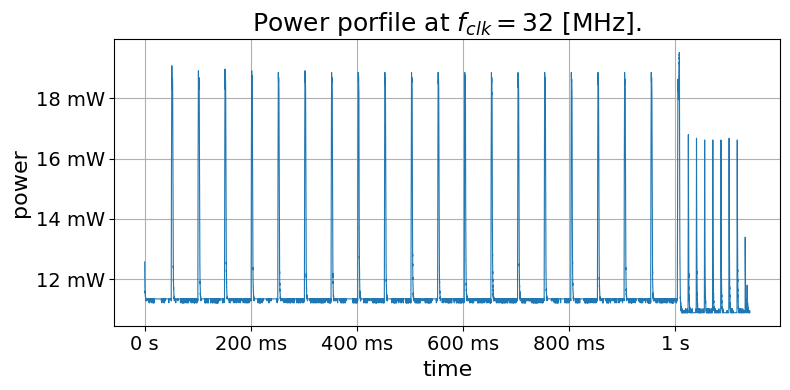

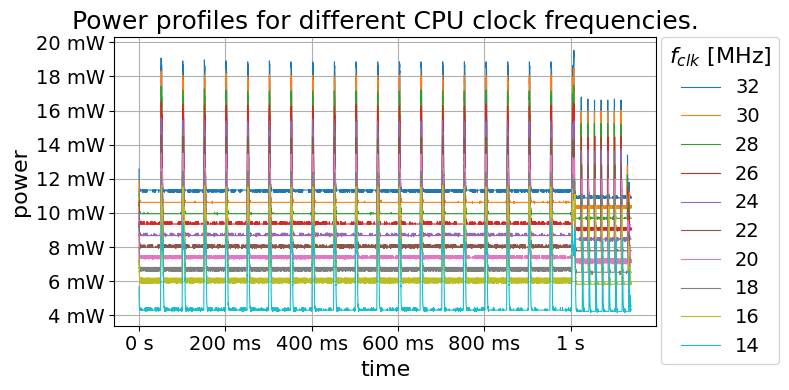

In [4]:
npps = []
for ind, pp in enumerate(pps):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.001)

    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.001:
            break
    
    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    stop = np.argmin(np.abs(time-1.14))

    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    npps.append(npp)

times = np.vstack([npp['t'] for npp in npps])
chs   = np.vstack([npp['w'] for npp in npps])
labels = ["32","30","28","26","24","22","20","18","16","14"]
labels_title = "$f_{clk}$ [MHz]"
title = "Power profiles for different CPU clock frequencies."
plot_pp([npps[0]['t']],[npps[0]['w']],title="Power porfile at $f_{clk} = 32$ [MHz].",file_path='Export/initial_pp.pdf')
plot_pp(times,chs,labels,labels_title,title,'Export/pp32to14.pdf')

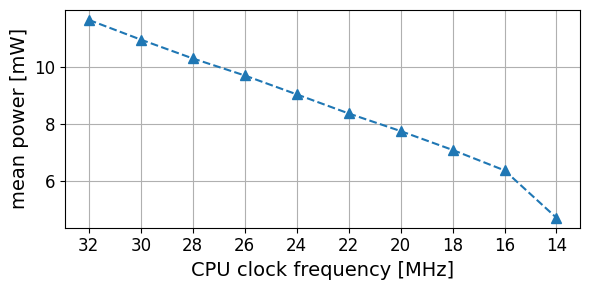

In [5]:
means = np.array([np.mean(npp['w']) for npp in npps])
f = np.arange(32,12,-2)
formatter_hz = EngFormatter(unit='Hz')
plt.rcParams["figure.figsize"] = (6,3)
plt.plot(f, means*1e3,'--^', markersize=7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.gca().xaxis.set_major_formatter(formatter_hz)
# plt.gca().yaxis.set_major_formatter(formatter_w)
plt.gca().set_xticks(f)
plt.gca().xaxis.set_inverted(True)
plt.ylabel('mean power [mW]',fontsize=14)
plt.xlabel('CPU clock frequency [MHz]',fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('Export/fVSW32to14.pdf')
plt.show()

In [6]:
pp10 = pd.read_csv("Data/10.csv",delimiter=',',skiprows=7, index_col=0)
pp8 = pd.read_csv("Data/8.csv",delimiter=',',skiprows=7, index_col=0)
pp6 = pd.read_csv("Data/6.csv",delimiter=',',skiprows=7, index_col=0)
pp4 = pd.read_csv("Data/4.csv",delimiter=',',skiprows=7, index_col=0)
pp2 = pd.read_csv("Data/2new.csv",delimiter=',',skiprows=7, index_col=0)
smallpps = [pp10,pp8,pp6,pp4,pp2]

for i,pp in enumerate(smallpps):
    pp['CH1(V)'] = (3.3 - pp['CH1(V)']) * pp['CH1(V)'] / 68
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

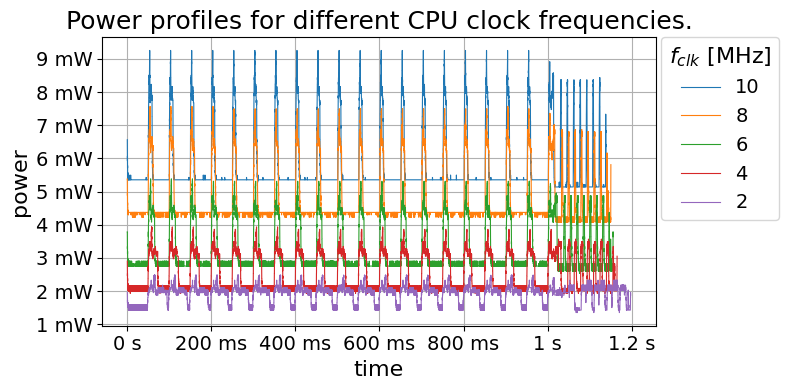

In [7]:
smallnpps = []
for ind, pp in enumerate(smallpps):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.0005)

    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.0003:
            break

    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    if   ind == 0:
        stop = np.argmin(np.abs(time-1.14))
    elif ind == 1:
        stop = np.argmin(np.abs(time-1.1505))
    elif ind == 2:
        stop = np.argmin(np.abs(time-1.1557))
    elif ind == 3:
        stop = np.argmin(np.abs(time-1.1653))
    else:
        stop = np.argmin(np.abs(time-1.1975))

    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    smallnpps.append(npp)

times = [npp['t'] for npp in smallnpps]
chs   = [npp['w'] for npp in smallnpps]
labels = ["10","8","6","4","2"]
labels_title = "$f_{clk}$ [MHz]"
title = "Power profiles for different CPU clock frequencies."
plot_pp(times,chs,labels,labels_title,title,'Export/pp10to2.pdf')

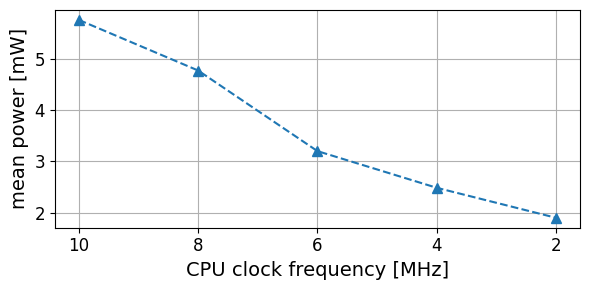

In [8]:
smallmeans = np.array([np.mean(npp['w']) for npp in smallnpps])
f = np.arange(10,0,-2)
formatter_hz = EngFormatter(unit='Hz')
plt.rcParams["figure.figsize"] = (6,3)
plt.plot(f, smallmeans*1e3,'--^', markersize=7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.gca().xaxis.set_major_formatter(formatter_hz)
# plt.gca().yaxis.set_major_formatter(formatter_w)
plt.gca().set_xticks(f)
plt.gca().xaxis.set_inverted(True)
plt.ylabel('mean power [mW]',fontsize=14)
plt.xlabel('CPU clock frequency [MHz]',fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('Export/fVSW10to2.pdf')
plt.show()

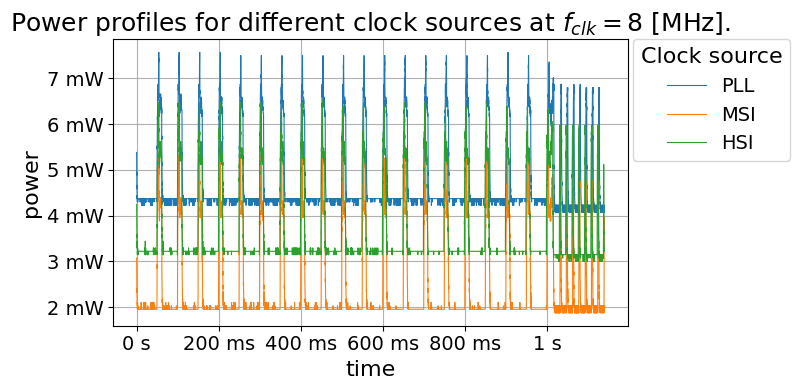

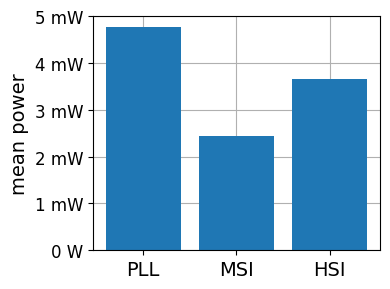

In [9]:
# pp8
pp8MSI = pd.read_csv("Data/8MSI.csv",delimiter=',',skiprows=7, index_col=0)
pp8HSI = pd.read_csv("Data/8HSI.csv",delimiter=',',skiprows=7, index_col=0)

for i,pp in enumerate([pp8MSI,pp8HSI]):
    pp['CH1(V)'] = (3.3 - pp['CH1(V)']) * pp['CH1(V)'] / 68
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

pps8 = [pp8,pp8MSI,pp8HSI]

npps8 = []
for ind, pp in enumerate(pps8):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.001)

    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.001:
            break
    
    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    stop = np.argmin(np.abs(time-1.14))

    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    npps8.append(npp)

times = [npp['t'] for npp in npps8]
chs   = [npp['w'] for npp in npps8]
labels = ["PLL", "MSI", "HSI"]
labels_title = "Clock source"
title = "Power profiles for different clock sources at $f_{clk} = 8$ [MHz]."
plot_pp(times,chs,labels,labels_title,title,'Export/pp8_clk_source.pdf')

means8 = np.array([np.mean(npp['w']) for npp in npps8])
plt.rcParams["figure.figsize"] = (4,3)
plt.bar(labels, means8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(formatter_w)
plt.ylabel('mean power',fontsize=14)
plt.gca().set_axisbelow(True)
plt.grid()
plt.tight_layout()
plt.savefig('Export/bar8.pdf')
plt.show()

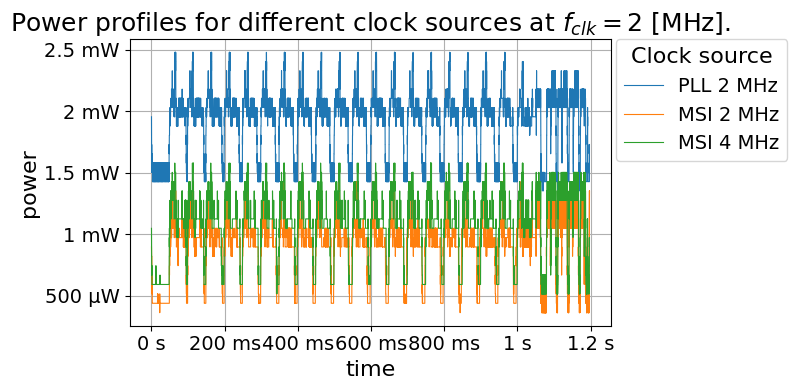

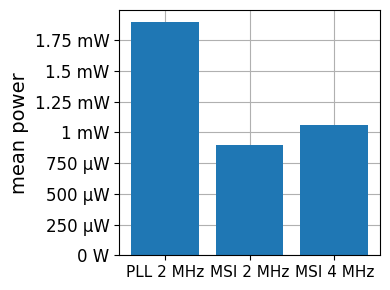

In [11]:
# pp2
pp2MSI2 = pd.read_csv("Data/2a.csv",delimiter=',',skiprows=7, index_col=0)
pp2MSI4 = pd.read_csv("Data/2b.csv",delimiter=',',skiprows=7, index_col=0)

for i,pp in enumerate([pp2MSI2,pp2MSI4]):
    pp['CH1(V)'] = (3.3 - pp['CH1(V)']) * pp['CH1(V)'] / 68
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

pps2 = [pp2,pp2MSI2,pp2MSI4]

npps2 = []
for ind, pp in enumerate(pps2):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.00035)

    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.0003:
            break
    
    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    stop = np.argmin(np.abs(time-1.197))


    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    npps2.append(npp)
    # plt.plot(npp['t'], npp['w'])
    # plt.xlim(0,1.2)
    # plt.show()

times = [npp['t'] for npp in npps2]
chs   = [npp['w'] for npp in npps2]
labels = ["PLL 2 MHz", "MSI 2 MHz", "MSI 4 MHz"]
labels_title = "Clock source"
title = "Power profiles for different clock sources at $f_{clk} = 2$ [MHz]."
plot_pp(times,chs,labels,labels_title,title,'Export/pp2_clk_config.pdf')


means2 = np.array([np.mean(npp['w']) for npp in npps2])
plt.rcParams["figure.figsize"] = (4,3)
plt.bar(labels, means2)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(formatter_w)
plt.ylabel('mean power',fontsize=14)
plt.gca().set_axisbelow(True)
plt.grid()
plt.tight_layout()
plt.savefig('Export/bar2.pdf')
plt.show()